<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/Orange%26Riverside_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ORANGE COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Orange_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Orange_County.csv to Orange_County (2).csv
            Orange_County
Dates                    
2000-01-31       276278.0
2000-02-29       278974.0
2000-03-31       280738.0
2000-04-30       284413.0
2000-05-31       287489.0
...                   ...
NaT                   NaN
NaT                   NaN
NaT                   NaN
NaT                   NaN
NaT                   NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Orange_County
Dates,
2000-01-31,276278.0
2000-02-29,278974.0
2000-03-31,280738.0
2000-04-30,284413.0
2000-05-31,287489.0
...,...
2021-12-31,984769.0
2022-01-31,1008652.0
2022-02-28,1030499.0


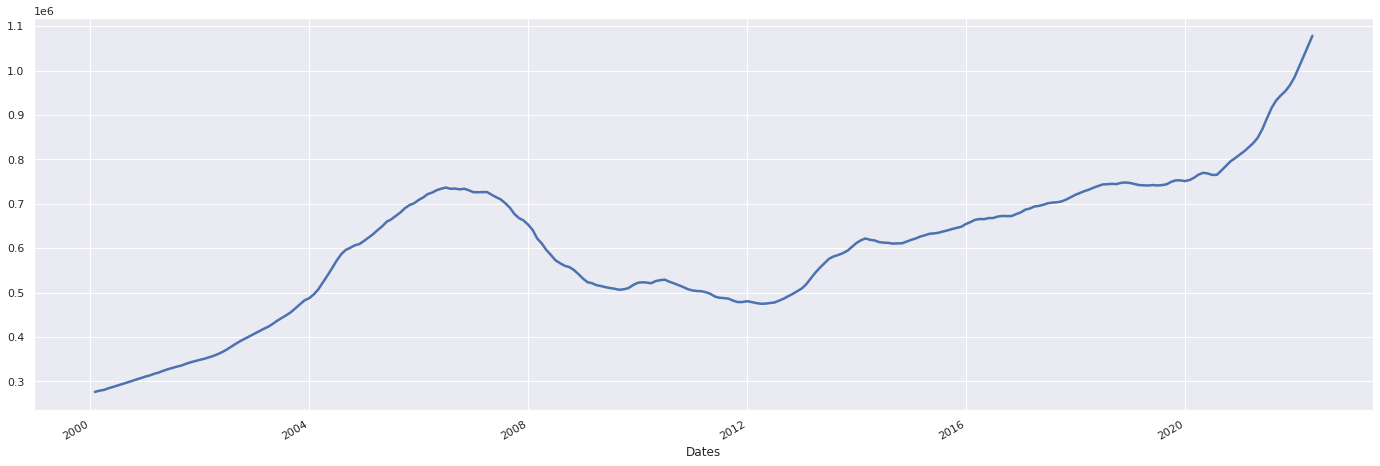

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Orange_County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

267

In [ ]:
DATOS = RealData_df['Orange_County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(225, 2, 1) (225, 1)
(38, 2, 1) (38, 1)


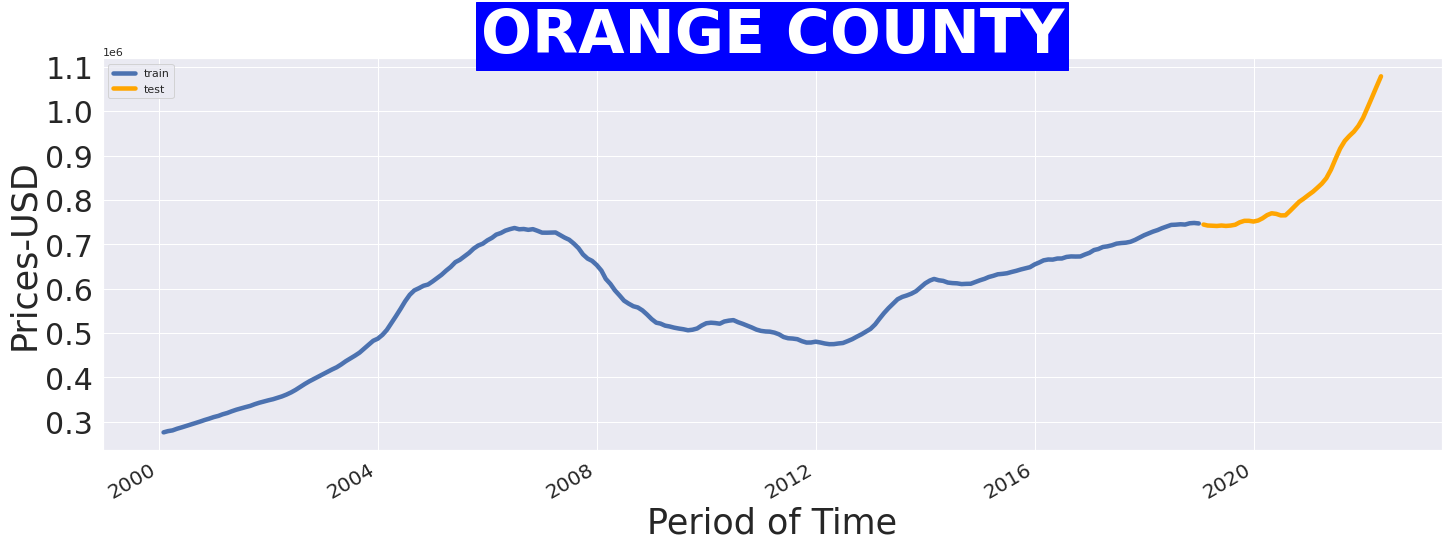

In [ ]:
RealData_df['Orange_County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Orange_County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("ORANGE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
45/45 [==============================] - 5s 18ms/step - loss: 0.1973 - mean_absolute_error: 0.3662 - val_loss: 0.4102 - val_mean_absolute_error: 0.5976
Epoch 2/60
45/45 [==============================] - 0s 5ms/step - loss: 0.0398 - mean_absolute_error: 0.1522 - val_loss: 0.0064 - val_mean_absolute_error: 0.0605
Epoch 3/60
45/45 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0419 - val_loss: 0.0022 - val_mean_absolute_error: 0.0366
Epoch 4/60
45/45 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0333 - val_loss: 0.0123 - val_mean_absolute_error: 0.0794
Epoch 5/60
45/45 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0334 - val_loss: 0.0112 - val_mean_absolute_error: 0.0754
Epoch 6/60
45/45 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0321 - val_loss: 0.0182 - val_mean_absolute_error: 0.0958
Epoch 7/60
45/45 [=========

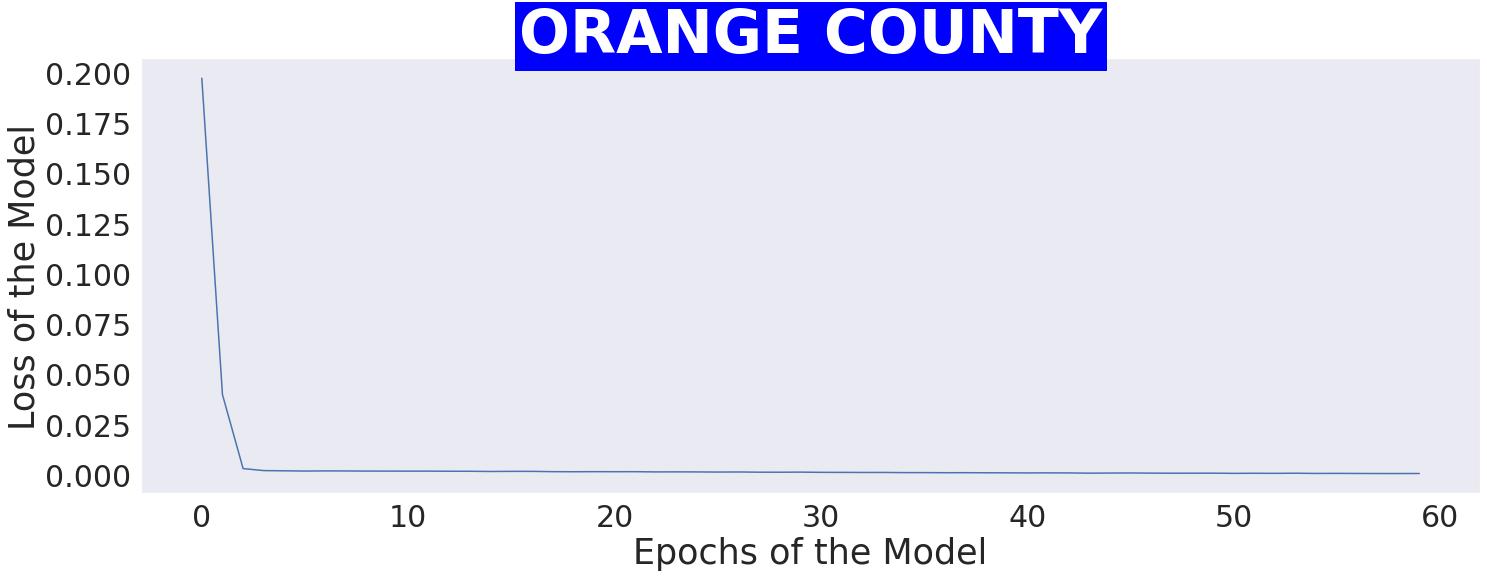

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("ORANGE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.96874917, 0.96912825, 0.9666233 , 0.97306126, 0.96651196,
       0.97249407, 0.98193294, 1.0104662 , 1.0227612 , 1.0184942 ,
       1.0091454 , 1.024514  , 1.0499855 , 1.0847439 , 1.099129  ,
       1.0860002 , 1.0684536 , 1.0736979 , 1.1298769 , 1.1754622 ,
       1.2227277 , 1.2504072 , 1.287973  , 1.3222183 , 1.3613316 ,
       1.4066023 , 1.4650785 , 1.5597748 , 1.6731201 , 1.7803893 ,
       1.8561584 , 1.904249  , 1.950048  , 2.0119    , 2.0974984 ,
       2.2099748 , 2.310304  , 2.4243624 ], dtype=float32)

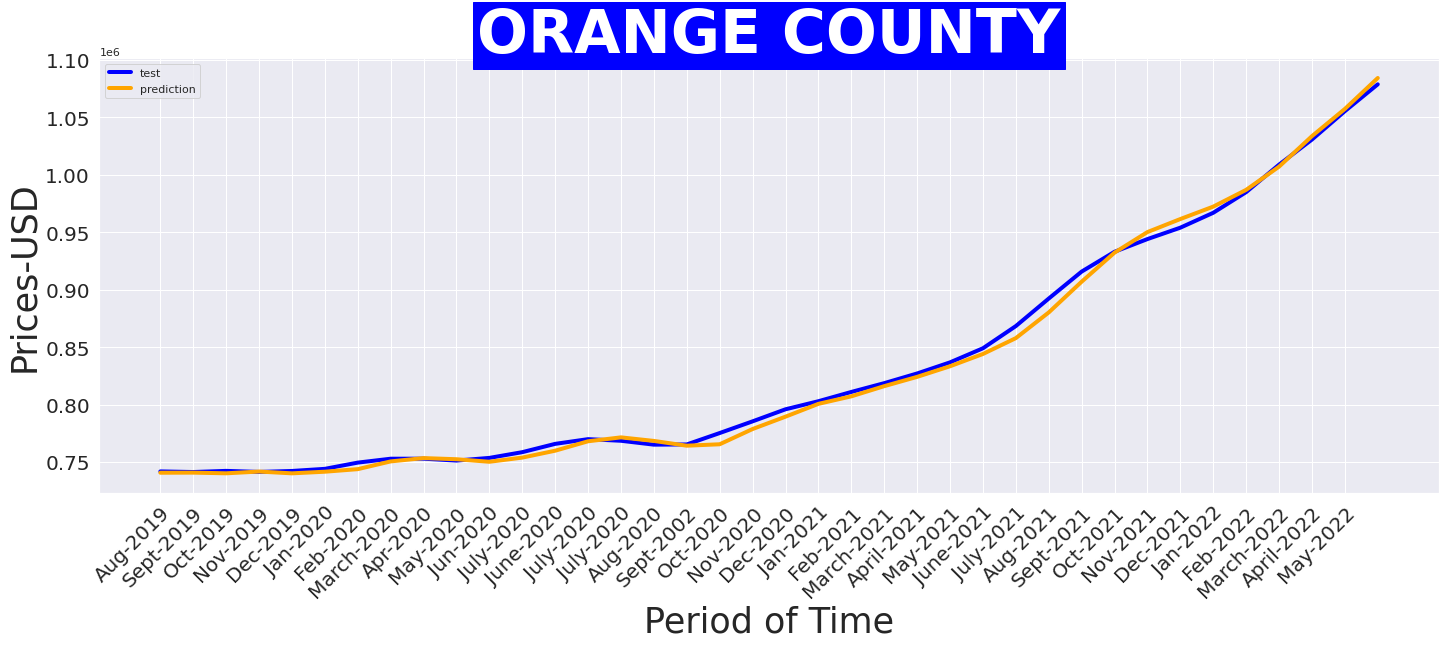

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ORANGE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'ORANGE COUNTY')

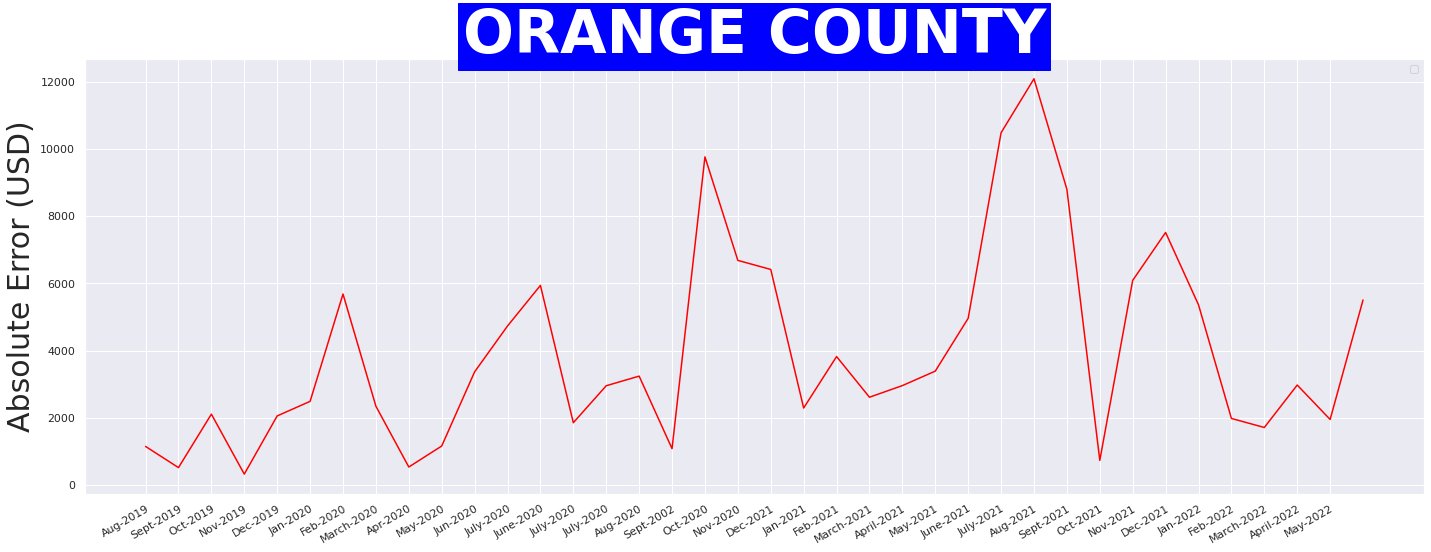

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("ORANGE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[ 740682.3 ],
       [ 740771.75],
       [ 740180.8 ],
       [ 741699.5 ],
       [ 740154.56],
       [ 741565.7 ],
       [ 743792.2 ],
       [ 750522.9 ],
       [ 753423.1 ],
       [ 752416.6 ],
       [ 750211.3 ],
       [ 753836.56],
       [ 759845.  ],
       [ 768044.06],
       [ 771437.3 ],
       [ 768340.44],
       [ 764201.4 ],
       [ 765438.5 ],
       [ 778690.4 ],
       [ 789443.44],
       [ 800592.8 ],
       [ 807122.06],
       [ 815983.44],
       [ 824061.44],
       [ 833287.8 ],
       [ 843966.6 ],
       [ 857760.44],
       [ 880098.2 ],
       [ 906835.  ],
       [ 932138.5 ],
       [ 950011.5 ],
       [ 961355.5 ],
       [ 972158.94],
       [ 986749.1 ],
       [1006940.75],
       [1033472.56],
       [1057139.  ],
       [1084044.  ]], dtype=float32)

# **RIVERSIDE COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Riverside_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Riverside_County.csv to Riverside_County (2).csv
            Riverside County
Dates                       
2000-01-31          163228.0
2000-02-29          163704.0
2000-03-31          164248.0
2000-04-30          165467.0
2000-05-31          166980.0
...                      ...
NaT                      NaN
NaT                      NaN
NaT                      NaN
NaT                      NaN
NaT                      NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Riverside County
Dates,
2000-01-31,163228.0
2000-02-29,163704.0
2000-03-31,164248.0
2000-04-30,165467.0
2000-05-31,166980.0
...,...
2021-12-31,560528.0
2022-01-31,571840.0
2022-02-28,585119.0


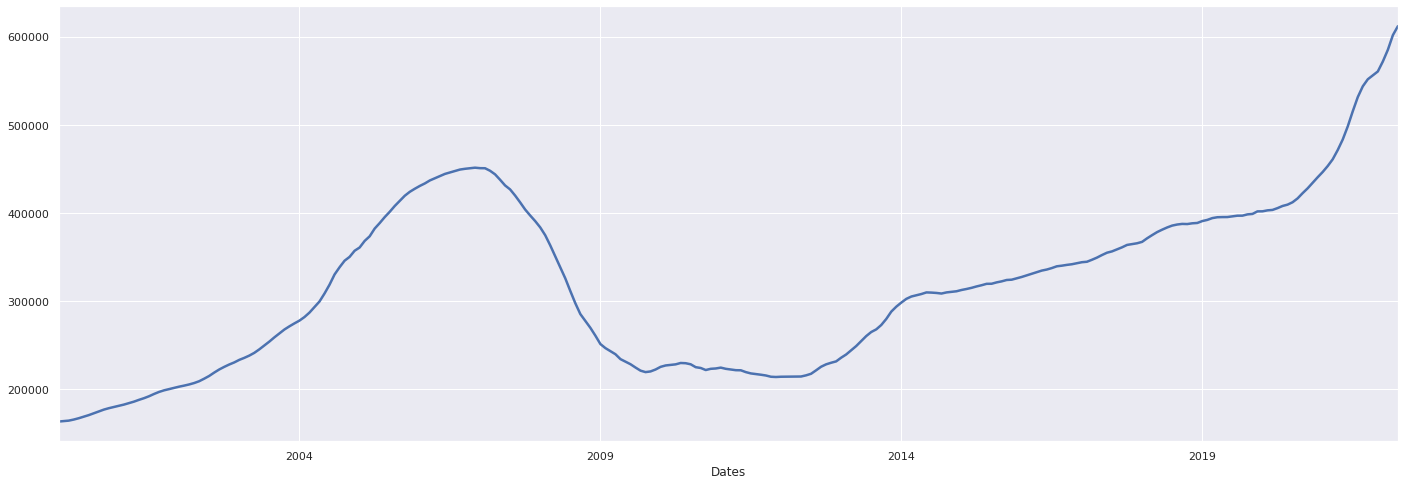

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Riverside County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Riverside County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


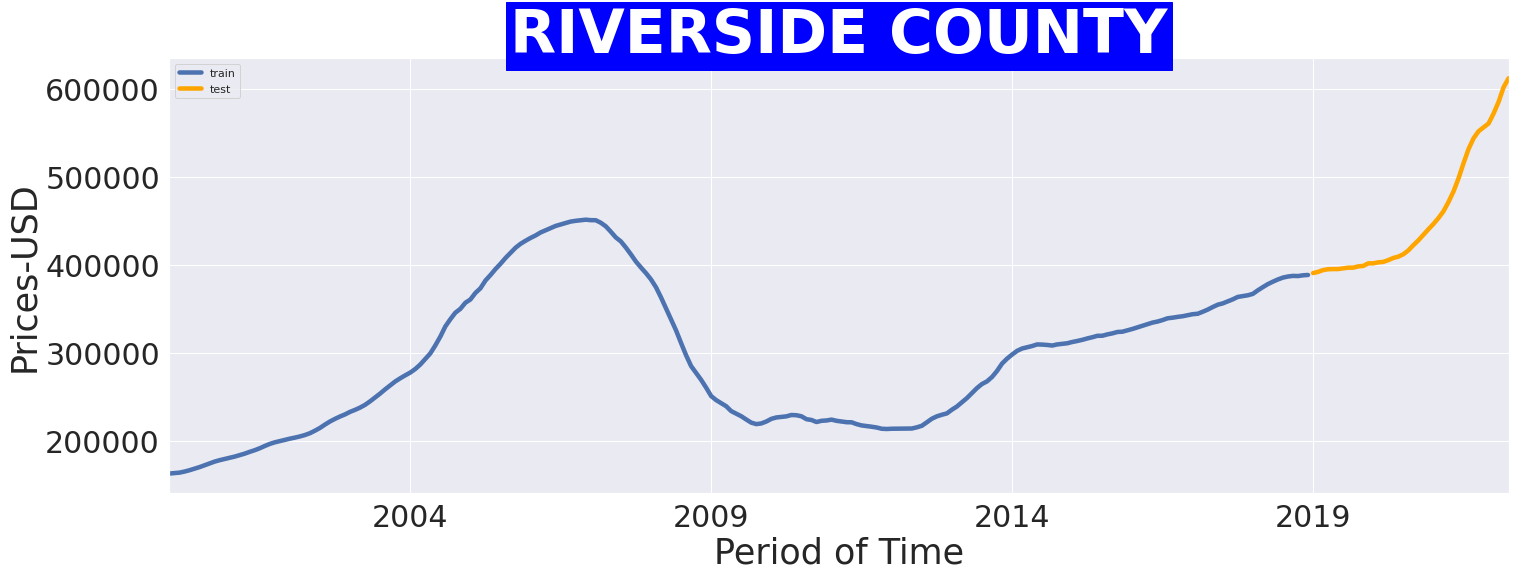

In [ ]:
RealData_df['Riverside County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Riverside County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("RIVERSIDE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 17ms/step - loss: 0.2042 - mean_absolute_error: 0.3868 - val_loss: 0.5917 - val_mean_absolute_error: 0.7037
Epoch 2/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.1623 - val_loss: 0.0448 - val_mean_absolute_error: 0.1646
Epoch 3/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0359 - val_loss: 0.0193 - val_mean_absolute_error: 0.0939
Epoch 4/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0355 - val_loss: 0.0213 - val_mean_absolute_error: 0.0997
Epoch 5/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0356 - val_loss: 0.0186 - val_mean_absolute_error: 0.0931
Epoch 6/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0354 - val_loss: 0.0083 - val_mean_absolute_error: 0.0671
Epoch 7/60
46/46 [=========

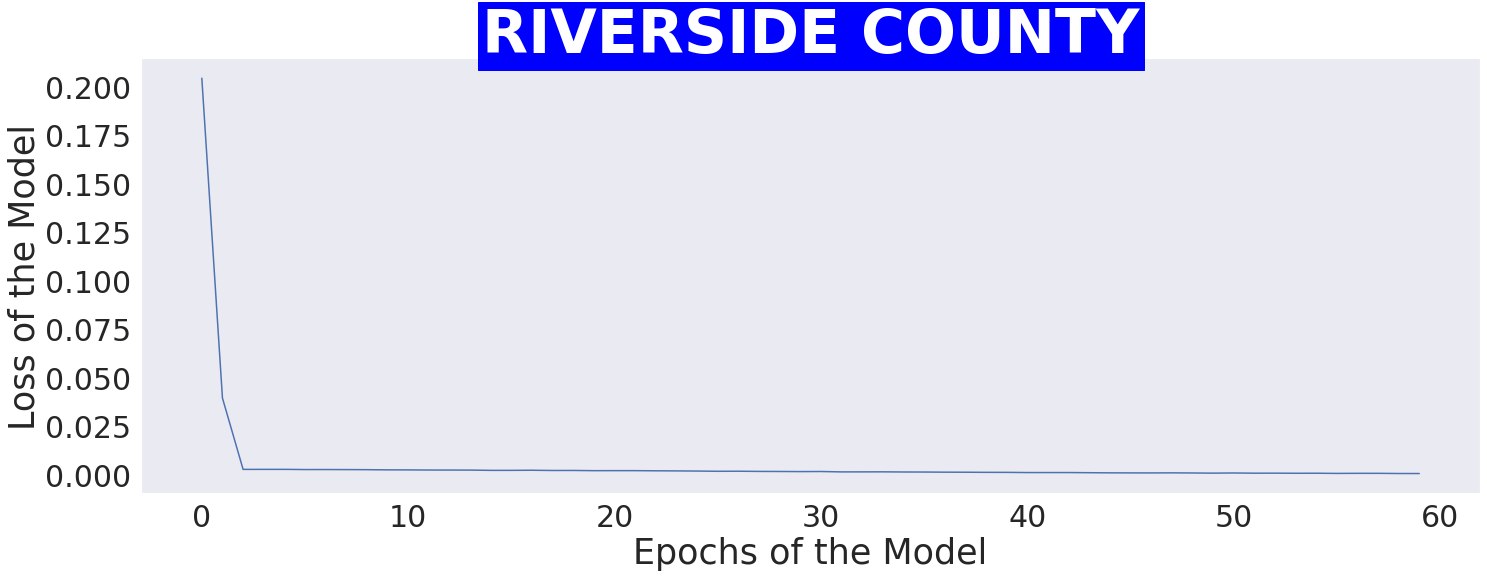

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("RIVERSIDE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.5926162 , 0.6095503 , 0.6121993 , 0.6102964 , 0.61009276,
       0.61819094, 0.6234771 , 0.62083095, 0.63621736, 0.636097  ,
       0.6653975 , 0.6548862 , 0.6665122 , 0.66749513, 0.68765366,
       0.7059402 , 0.71311575, 0.736404  , 0.77340454, 0.8208216 ,
       0.85767686, 0.90483475, 0.94994164, 0.9913536 , 1.0425961 ,
       1.1018552 , 1.189057  , 1.2829214 , 1.4043844 , 1.543225  ,
       1.6643884 , 1.7493806 , 1.8015394 , 1.8276955 , 1.8644016 ,
       1.9770643 , 2.0933788 , 2.2423086 ], dtype=float32)

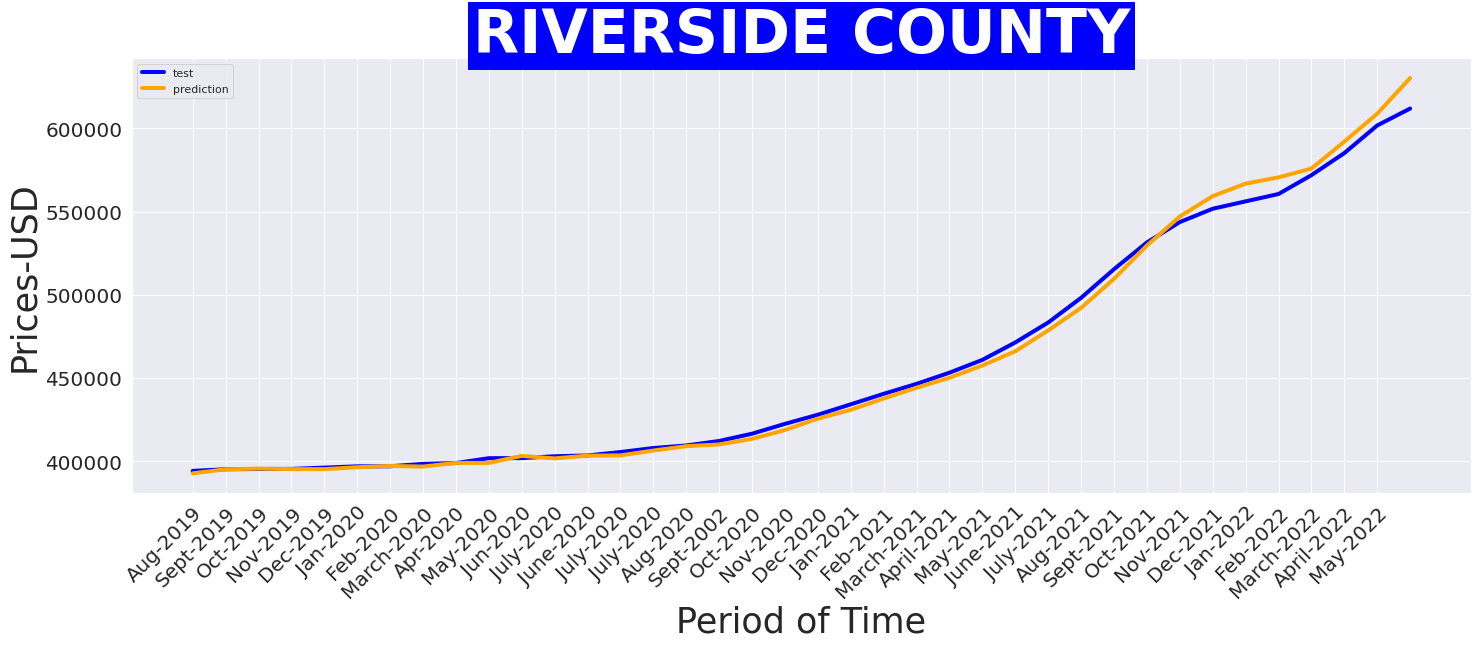

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("RIVERSIDE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RIVERSIDE COUNTY')

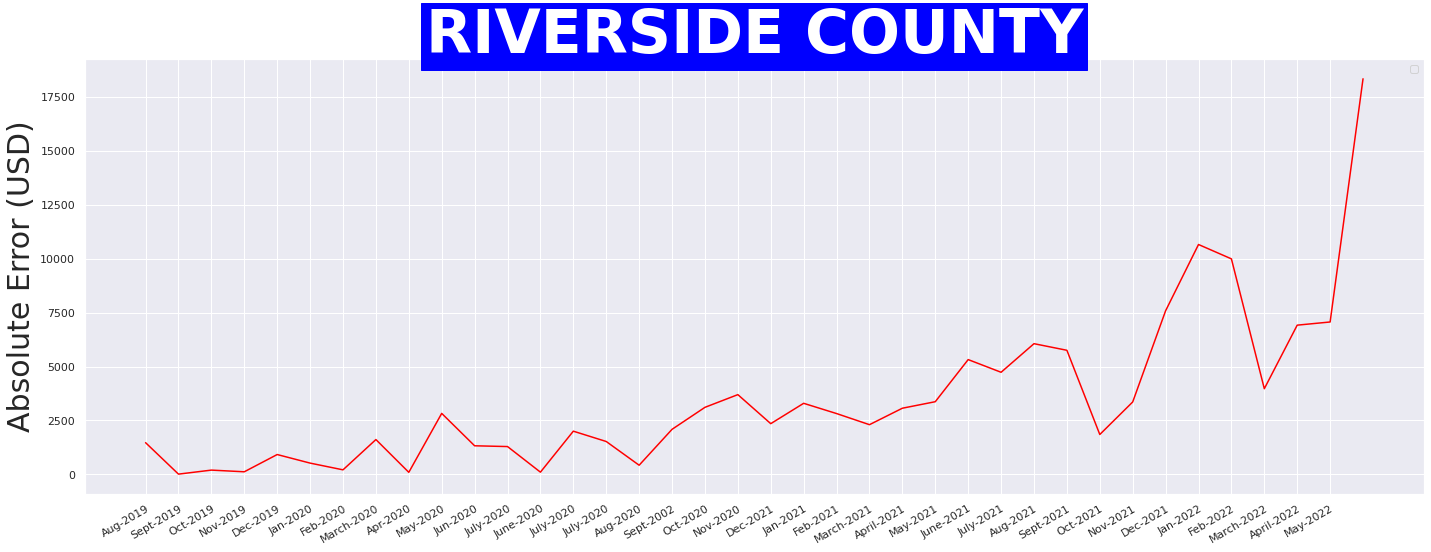

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("RIVERSIDE COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[392627.66],
       [395066.84],
       [395448.38],
       [395174.28],
       [395144.97],
       [396311.4 ],
       [397072.84],
       [396691.7 ],
       [398907.9 ],
       [398890.62],
       [403111.03],
       [401596.97],
       [403271.6 ],
       [403413.16],
       [406316.78],
       [408950.78],
       [409984.34],
       [413338.78],
       [418668.3 ],
       [425498.25],
       [430806.84],
       [437599.44],
       [444096.6 ],
       [450061.6 ],
       [457442.5 ],
       [465978.2 ],
       [478538.7 ],
       [492058.88],
       [509554.3 ],
       [529552.9 ],
       [547005.2 ],
       [559247.4 ],
       [566760.3 ],
       [570527.9 ],
       [575814.94],
       [592042.8 ],
       [608796.75],
       [630248.5 ]], dtype=float32)